# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Counters
city_counter = 1
set_counter = 1

# Create the lists to hold relative data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Begin Data Retrieval")

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
    
    # Group cities as sets of 50s
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 1
         
    # Create API url for each city
    query_url = base_url +"&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    # Increase city counter
    city_counter += 1
    
   # Add the values to the lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass
        
print("Data Retrieval Complete")

Begin Data Retrieval
Processing Record 1 of Set 1 | hami
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | ardakan
Processing Record 7 of Set 1 | cap malheureux
Processing Record 8 of Set 1 | half moon bay
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | karla
Processing Record 13 of Set 1 | yulara
Processing Record 14 of Set 1 | chaman
Processing Record 15 of Set 1 | alma
Processing Record 16 of Set 1 | hay river
Processing Record 17 of Set 1 | provideniya
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | amderma
City not found. Skipping...
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | varkaus
Processing Record 22 of Set 1 | bukene
Processing Record 23 of Set 1 | ushuaia
Processing Record 

Processing Record 40 of Set 4 | saint george
Processing Record 41 of Set 4 | cabreuva
Processing Record 42 of Set 4 | pumiao
Processing Record 43 of Set 4 | terney
Processing Record 44 of Set 4 | loandjili
Processing Record 45 of Set 4 | kawalu
Processing Record 46 of Set 4 | mount gambier
Processing Record 47 of Set 4 | luderitz
Processing Record 48 of Set 4 | honningsvag
Processing Record 49 of Set 4 | balkanabat
Processing Record 50 of Set 4 | utamysh
Processing Record 1 of Set 5 | ilulissat
Processing Record 2 of Set 5 | sioux lookout
Processing Record 3 of Set 5 | umm lajj
Processing Record 4 of Set 5 | gamba
Processing Record 5 of Set 5 | okato
Processing Record 6 of Set 5 | llata
Processing Record 7 of Set 5 | leningradskiy
Processing Record 8 of Set 5 | ponta do sol
Processing Record 9 of Set 5 | hualmay
Processing Record 10 of Set 5 | sasina
Processing Record 11 of Set 5 | masvingo
Processing Record 12 of Set 5 | yuryevets
Processing Record 13 of Set 5 | bredasdorp
Processing 

Processing Record 32 of Set 8 | nata
Processing Record 33 of Set 8 | kieta
Processing Record 34 of Set 8 | pelym
Processing Record 35 of Set 8 | novosheshminsk
Processing Record 36 of Set 8 | aflu
City not found. Skipping...
Processing Record 37 of Set 8 | teya
Processing Record 38 of Set 8 | porto santo
Processing Record 39 of Set 8 | castelo do piaui
Processing Record 40 of Set 8 | faanui
Processing Record 41 of Set 8 | riberalta
Processing Record 42 of Set 8 | bischofswerda
Processing Record 43 of Set 8 | ulaangom
Processing Record 44 of Set 8 | mae sai
Processing Record 45 of Set 8 | pizarro
Processing Record 46 of Set 8 | serdobsk
Processing Record 47 of Set 8 | alberton
Processing Record 48 of Set 8 | mandalgovi
Processing Record 49 of Set 8 | matamoros
Processing Record 50 of Set 8 | requena
Processing Record 1 of Set 9 | nizhniy tsasuchey
Processing Record 2 of Set 9 | nome
Processing Record 3 of Set 9 | nakhon phanom
Processing Record 4 of Set 9 | sigli
Processing Record 5 of 

Processing Record 21 of Set 12 | sorland
Processing Record 22 of Set 12 | seydisehir
Processing Record 23 of Set 12 | gbadolite
Processing Record 24 of Set 12 | akonolinga
Processing Record 25 of Set 12 | ostrovnoy
Processing Record 26 of Set 12 | lata
Processing Record 27 of Set 12 | voh
Processing Record 28 of Set 12 | qandala
Processing Record 29 of Set 12 | auki
Processing Record 30 of Set 12 | cosala
Processing Record 31 of Set 12 | barguzin
Processing Record 32 of Set 12 | barra do garcas
Processing Record 33 of Set 12 | opuwo
Processing Record 34 of Set 12 | dubenskiy
City not found. Skipping...
Processing Record 35 of Set 12 | parfino
Processing Record 36 of Set 12 | shingu
Processing Record 37 of Set 12 | vagur
Processing Record 38 of Set 12 | grand-santi
Processing Record 39 of Set 12 | znamenka
Processing Record 40 of Set 12 | inirida
Processing Record 41 of Set 12 | jibuti
Processing Record 42 of Set 12 | lazi
Processing Record 43 of Set 12 | bella vista
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictionary to keep data 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create the data frame and count variables for each columns
weather_df = pd.DataFrame(weather_data)
weather_df.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [6]:
# Display the data frame
weather_df.head()

City  Cloudiness Country        Date  Humidity      Lat       Lng  \
0       Kumul          45      CN  1611605200        73  42.8000   93.4500   
1   Hong Kong           1      HK  1611605112        86  22.2855  114.1577   
2      Hobart          75      AU  1611605201        94 -42.8794  147.3294   
3    Hamilton          90      US  1611604715        86  39.1834  -84.5333   
4  Butaritari          94      KI  1611605201        79   3.0707  172.7902   

   Max Temp  Wind Speed  
0     15.64        1.36  
1     64.99        1.99  
2     62.01        6.91  
3     33.80        9.22  
4     79.14       10.00

In [34]:
#export to csv file 

weather_df.to_csv("weather_data.csv")
countforme=len(weather_df)
countforme

558

In [35]:
weather_df.dtypes

City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

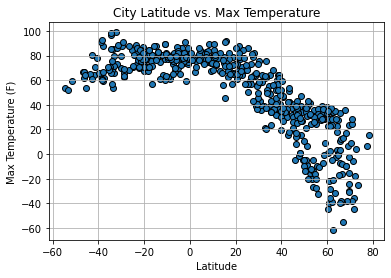

In [31]:
scatlat=weather_df['Lat']
scattemp=weather_df['Max Temp']


plt.scatter(scatlat,scattemp,marker='o',edgecolors='black')
plt.title(f"City Latitude vs. Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

plt.savefig("LatvsTemp.png")
plt.show()


## Latitude vs. Humidity Plot

This plot is looking at the relationship between latitude and humidity. It shows that there is not much of a correlation between latitude and humidity.

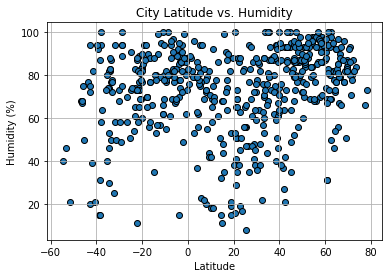

In [36]:
scathum = weather_df['Humidity']
scatlat=weather_df['Lat']

plt.scatter(scatlat,scathum,marker='o',edgecolors='black')
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

plt.savefig("LatvsHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

This plot is looking at the relationship between latitude and cloudiness. This also shows that there does not seem to be much of a correlation between latitude and cloudiness.

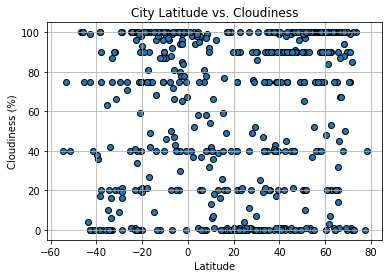

In [37]:
scatcloud = weather_df["Cloudiness"]
scatlat=weather_df['Lat']

plt.scatter(scatlat,scatcloud,marker='o',edgecolors='black')
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

plt.savefig("LatvsCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

This plot is looking at the relationship between latitude and wind speed. It shows that wind speeds are generally greater the farther away from the equator (latitude 0) you get.

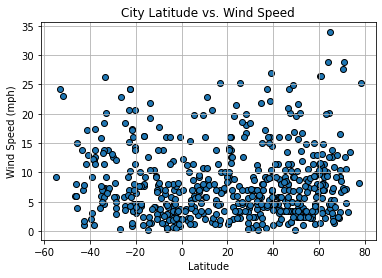

In [49]:
scatwindspeed = weather_df["Wind Speed"]
scatlat=weather_df['Lat']

plt.scatter(scatlat,scatwindspeed,marker='o',edgecolors='black')
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

plt.savefig("LatvsWindspeed.png")
plt.show()

## Linear Regression

In [67]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [68]:
#create Northern and Southern Hemisphere DataFrames

north_hem=weather_df.loc[weather_df['Lat']>=0,:]
south_hem=weather_df.loc[weather_df['Lat']<0,:]
north_hem.head()

City  Cloudiness Country        Date  Humidity      Lat       Lng  \
0       Kumul          45      CN  1611605200        73  42.8000   93.4500   
1   Hong Kong           1      HK  1611605112        86  22.2855  114.1577   
3    Hamilton          90      US  1611604715        86  39.1834  -84.5333   
4  Butaritari          94      KI  1611605201        79   3.0707  172.7902   
5     Ardakān           0      IR  1611605201        22  32.3100   54.0175   

   Max Temp  Wind Speed  
0     15.64        1.36  
1     64.99        1.99  
3     33.80        9.22  
4     79.14       10.00  
5     39.20        2.30

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8375262109878066


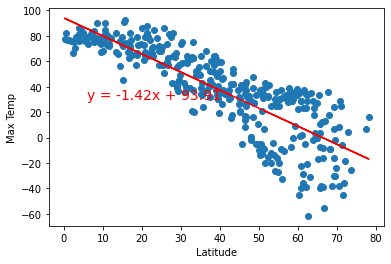

<Figure size 432x288 with 0 Axes>

In [70]:
x_values = north_hem["Lat"]
y_values = north_hem["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig("Northhempisphere.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.337610490634773


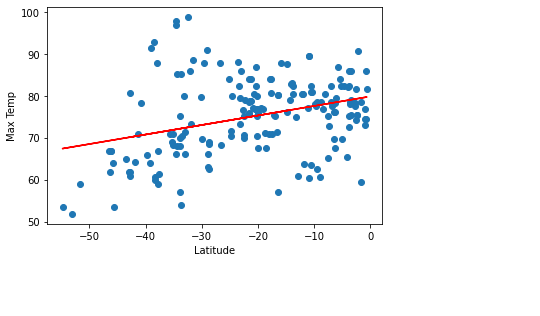

The high r value indicates a strong positive correlation between latitude and max temperature.


<Figure size 432x288 with 0 Axes>

In [72]:
x_values = south_hem["Lat"]
y_values = south_hem["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig("Southhemisphere.png")

print("The high r value indicates a strong positive correlation between latitude and max temperature.")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.37390602292819636


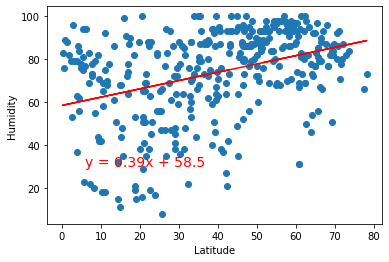

<Figure size 432x288 with 0 Axes>

In [75]:
x_values = north_hem["Lat"]
y_values = north_hem["Humidity"]

plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig("Northhem.humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3502058578378534


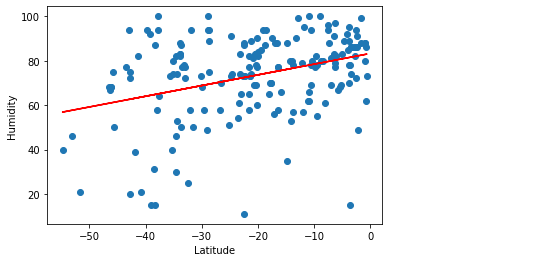

<Figure size 432x288 with 0 Axes>

In [78]:
x_values = south_hem["Lat"]
y_values = south_hem["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig("Southhemp.humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2548317607782679


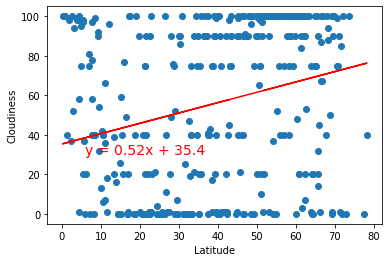

<Figure size 432x288 with 0 Axes>

In [80]:
x_values = north_hem["Lat"]
y_values = north_hem["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))
plt.savefig("Northhem.Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.32057867047750516


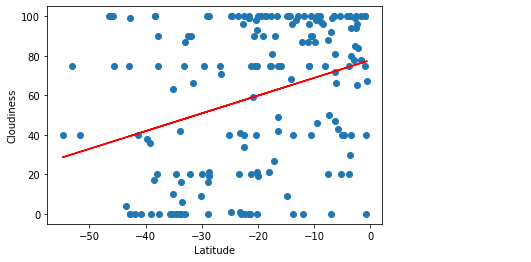

<Figure size 432x288 with 0 Axes>

In [82]:
x_values = south_hem["Lat"]
y_values = south_hem["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig("Southhem.cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0846618599568762


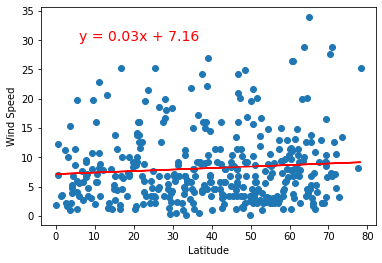

<Figure size 432x288 with 0 Axes>

In [84]:
x_values = north_hem["Lat"]
y_values = north_hem["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig("Northhem.windspeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.30661684627052715


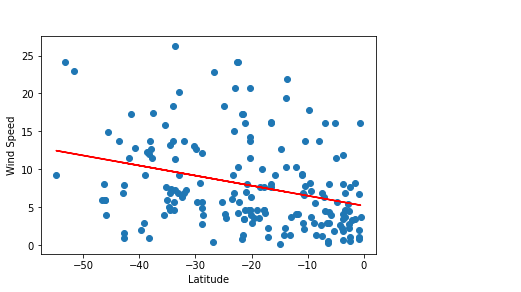

<Figure size 432x288 with 0 Axes>

In [86]:
x_values = south_hem["Lat"]
y_values = south_hem["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig("Southhem.windspeed.png")